In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
# It contains 60,000 32x32 color images in 10 classes
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 35s 0us/step


In [3]:
# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
# Define class labels
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]


In [5]:
# Create a Sequential CNN model
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer (10 classes)
model.add(layers.Dense(10, activation='softmax'))


In [6]:
# Display model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
# Train the CNN model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10


1563/1563 [==============================] - 61s 37ms/step - loss: 1.5209 - accuracy: 0.4469 - val_loss: 1.2514 - val_accuracy: 0.5486
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1522 - accuracy: 0.5912 - val_loss: 1.0606 - val_accuracy: 0.6191
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0082 - accuracy: 0.6457 - val_loss: 1.0071 - val_accuracy: 0.6427
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9158 - accuracy: 0.6783 - val_loss: 0.9468 - val_accuracy: 0.6708
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8424 - accuracy: 0.7054 - val_loss: 0.9507 - val_accuracy: 0.6712
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7810 - accuracy: 0.7261 - val_loss: 0.9211 - val_accuracy: 0.6793
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7300 - accuracy: 0.7431 - val_loss: 0.8730

In [9]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


313/313 [==============================] - 3s 9ms/step - loss: 0.8801 - accuracy: 0.7079
Test Accuracy: 0.7078999876976013
Test Loss: 0.8801497220993042


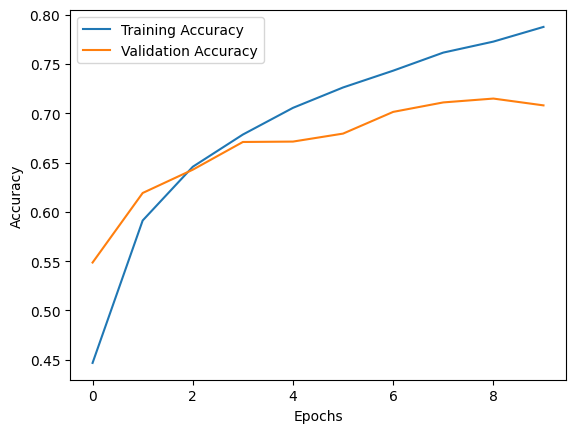

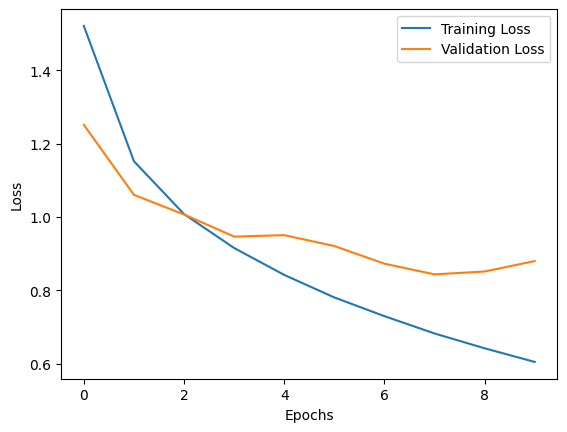

In [10]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 [==============================] - 3s 9ms/step


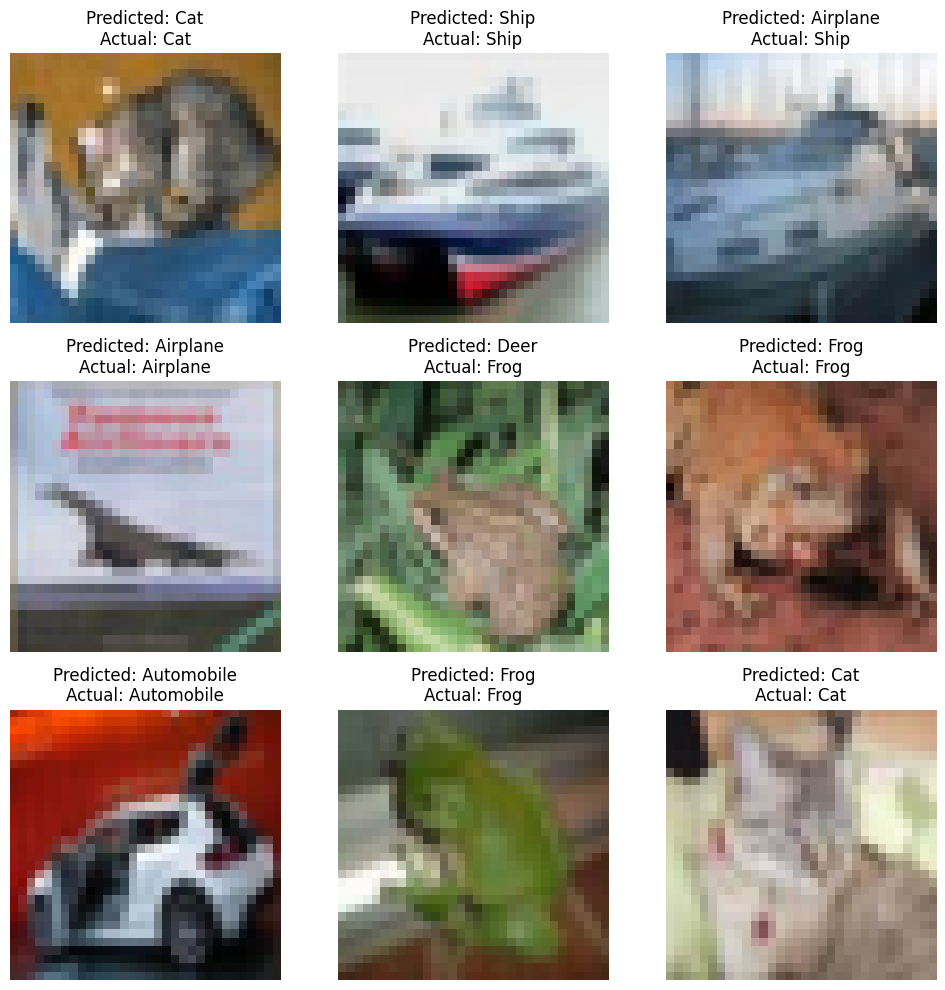

In [13]:


# Number of test images to display
num_images = 9

# Make predictions on test images
predictions = model.predict(x_test)

# Create a 3x3 grid to display images
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    
    # Display image
    plt.imshow(x_test[i])
    plt.axis('off')
    
    # Get predicted and actual labels
    predicted_label = class_names[np.argmax(predictions[i])]
    actual_label = class_names[y_test[i][0]]
    
    # Title with prediction result
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")

plt.tight_layout()
plt.show()
